<a href="https://colab.research.google.com/github/SalmanOkz/Deep_Learning_Finance_Project/blob/main/Deep_Learning_Assingemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter # Useful for imbalance
import warnings
warnings.filterwarnings('ignore')

# Assuming the CSV is in the same directory or the user specifies the path
file_path = '/content/creditcard.csv'
df = pd.read_csv(file_path)

print("--- Data Loaded Successfully ---")

--- Data Loaded Successfully ---


In [2]:
# Check the shape (rows, columns)
print("Shape of the Dataset (Rows, Columns):", df.shape)
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Column Info and Data Types ---")
# Check column names, non-null counts, and data types
df.info()

print("\n--- Summary Statistics (Numerical Columns) ---")
# Get statistical summary (mean, std, min, max, quartiles)
print(df.describe())

Shape of the Dataset (Rows, Columns): (47628, 31)

--- First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.7

In [3]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



--- Class Distribution ---
Class
0.0    47481
1.0      146
Name: count, dtype: int64
Percentage of Fraudulent Transactions: 0.3065%


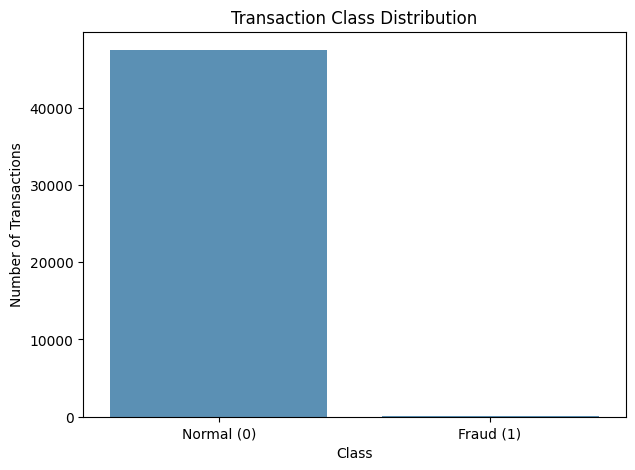

In [4]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()
print("\n--- Class Distribution ---")
print(class_counts)

# Calculate the percentage of fraudulent transactions
fraud_percentage = (class_counts[1] / df.shape[0]) * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

# Visualize the imbalance
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Transaction Class Distribution')
plt.xticks(class_counts.index, ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.show()

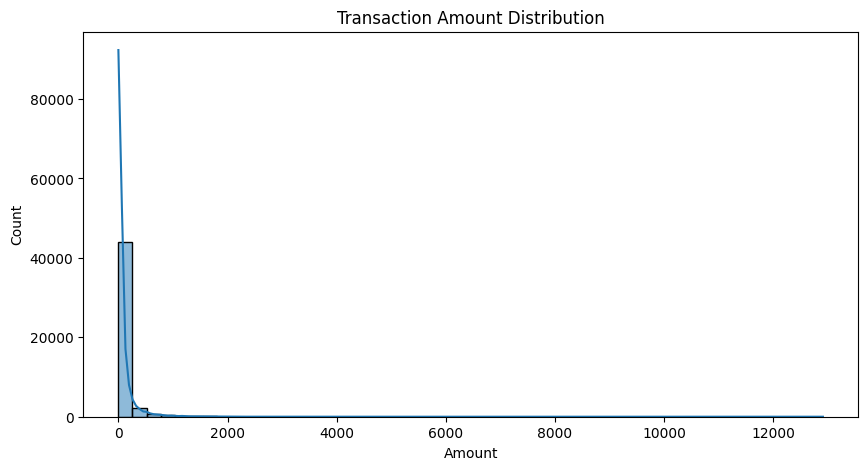

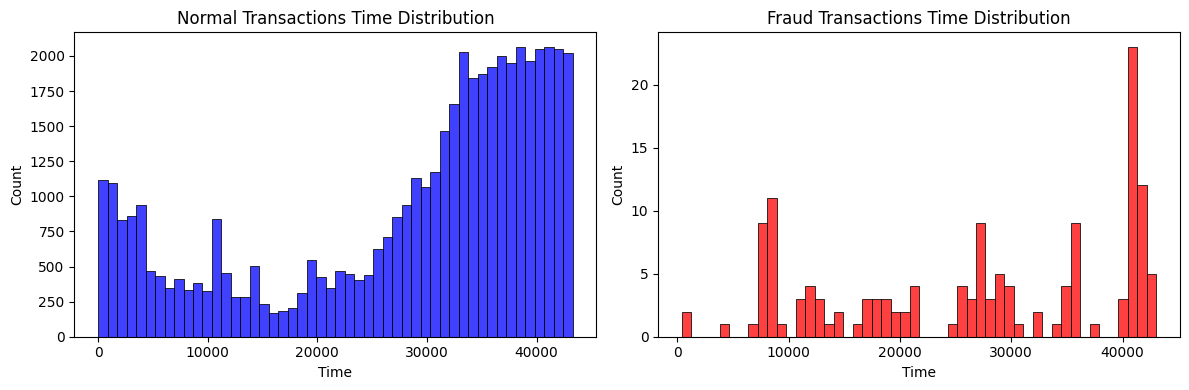

In [5]:
# Visualize the distribution of the 'Amount'
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.show()

# Visualize the distribution of 'Time' for normal vs. fraud transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(df[df['Class'] == 0]['Time'], bins=50, ax=ax1, color='blue')
ax1.set_title('Normal Transactions Time Distribution')

sns.histplot(df[df['Class'] == 1]['Time'], bins=50, ax=ax2, color='red')
ax2.set_title('Fraud Transactions Time Distribution')

plt.tight_layout()
plt.show()


--- Correlation with Target Variable (Class) ---
Class     1.000000
V11       0.250789
V4        0.230421
V2        0.186846
V8        0.170748
V27       0.087371
V21       0.068333
V19       0.063510
V20       0.032635
V26       0.015968
V25       0.014880
V13       0.010066
V28       0.005465
Amount    0.001996
V15       0.000483
Time     -0.006536
V24      -0.008752
V22      -0.010533
V23      -0.023597
V6       -0.101294
V9       -0.172080
V5       -0.215258
V1       -0.220880
V18      -0.227600
V12      -0.342684
V16      -0.342738
V7       -0.346929
V10      -0.363168
V3       -0.408689
V14      -0.444894
V17      -0.496720
Name: Class, dtype: float64


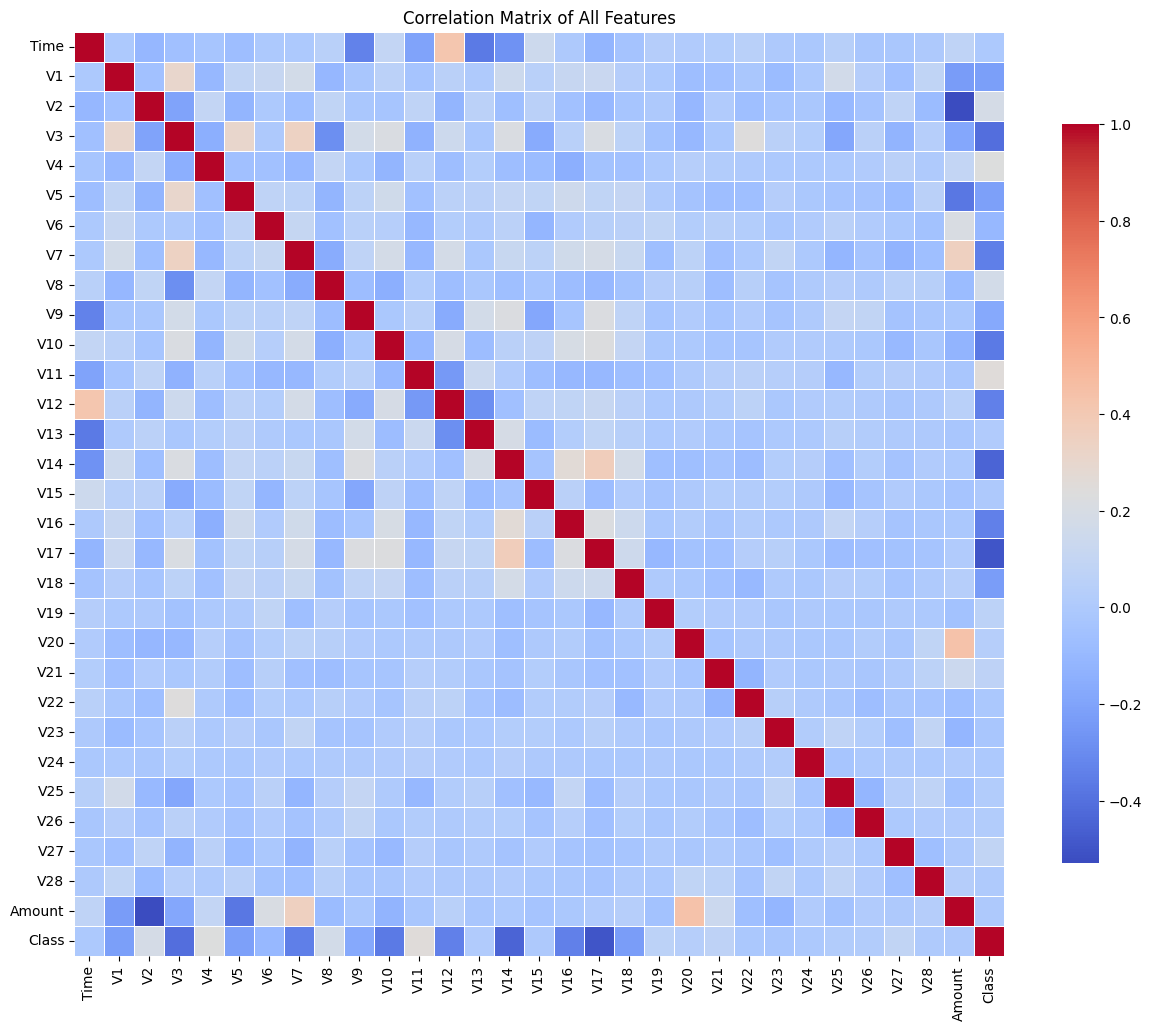

In [6]:
# Calculate the correlation of all features with the target variable 'Class'
correlation_matrix = df.corr()
class_correlation = correlation_matrix['Class'].sort_values(ascending=False)

print("\n--- Correlation with Target Variable (Class) ---")
print(class_correlation)

# Visualize the correlation matrix (optional, but shows relationships between V features)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of All Features')
plt.show()

In [7]:
# Initialize the Standard Scaler
scaler = StandardScaler()

# 1. Scale the 'Amount' column
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# 2. Scale the 'Time' column
# Note: Time can often be removed or converted to a cyclical feature, but scaling it is the simplest approach
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original unscaled columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Re-arrange columns to put the target 'Class' at the end (standard practice)
features = [col for col in df.columns if col != 'Class']
df = df[features + ['Class']]

print("\n--- Data Preprocessing Complete ---")
print("New Column Order (Head):")
print(df.head())


--- Data Preprocessing Complete ---
New Column Order (Head):
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

      

In [8]:
# X contains all features (V1-V28, Scaled_Amount, Scaled_Time)
X = df.drop('Class', axis=1).values

# y is the target variable (Class)
y = df['Class'].values

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (47628, 30)
Target (y) shape: (47628,)


In [12]:
# Check the original DataFrame column 'Class' for missing values
nan_count = df['Class'].isnull().sum()
print(f"Number of NaN values in the target column 'Class': {nan_count}")

# Check the distribution of NaN values
if nan_count > 0:
    print("\nRows with NaN in 'Class':")
    print(df[df['Class'].isnull()].head())

Number of NaN values in the target column 'Class': 1

Rows with NaN in 'Class':
             V1        V2        V3        V4        V5        V6        V7  \
47627  1.121749 -0.208202  0.660816  0.857988 -0.823614 -0.422509 -0.286708   

             V8        V9       V10  ...  V22  V23  V24  V25  V26  V27  V28  \
47627  0.098616  0.541126 -0.016825  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       Scaled_Amount  Scaled_Time  Class  
47627            NaN      1.16131    NaN  

[1 rows x 31 columns]


In [13]:
# Assuming your DataFrame is named 'df' and contains the 31 columns shown above.

# Identify all columns that should NOT have NaNs
cols_to_check = df.columns

# Drop all rows where ANY of the critical columns have a NaN value
# The 'dropna' function defaults to checking all columns if 'subset' is not specified,
# but being explicit is safer:
df_cleaned = df.dropna(subset=cols_to_check)

print(f"Original number of rows: {len(df)}")
print(f"Number of rows removed (NaN in any column): {len(df) - len(df_cleaned)}")

# Verify the cleanup
print("\nFinal NaN check (should all be 0):")
print(df_cleaned.isnull().sum().to_string())

Original number of rows: 47628
Number of rows removed (NaN in any column): 1

Final NaN check (should all be 0):
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Scaled_Amount    0
Scaled_Time      0
Class            0


In [16]:
# Redefine X (features) and y (target) from the cleaned DataFrame
X_clean = df_cleaned.drop('Class', axis=1).values
y_clean = df_cleaned['Class'].values

print(f"\nClean Features (X) shape: {X_clean.shape}")
print(f"Clean Target (y) shape: {y_clean.shape}")

# This will now successfully run:
from sklearn.model_selection import train_test_split

X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_raw, y_train_raw, test_size=0.25, random_state=42, stratify=y_train_raw
)

print("\n--- Final Split Successful ---")
print(f"Training features shape: {X_train_raw.shape}")


Clean Features (X) shape: (47627, 30)
Clean Target (y) shape: (47627,)

--- Final Split Successful ---
Training features shape: (38101, 30)


In [17]:
# Apply SMOTE to the training set
print("Before SMOTE:", Counter(y_train))
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))

# Use X_train_smote and y_train_smote for training

Before SMOTE: Counter({np.float64(0.0): 28487, np.float64(1.0): 88})
After SMOTE: Counter({np.float64(0.0): 28487, np.float64(1.0): 28487})


In [18]:
from sklearn.utils import class_weight
# Calculate weights inversely proportional to class frequencies
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_raw), y=y_train_raw
)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

# Pass this dictionary to the model's .fit() method: model.fit(..., class_weight=class_weight_dict)

Class Weights: {0: np.float64(0.5015401221566975), 1: np.float64(162.82478632478632)}


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def create_model(layers, activation='relu', optimizer='adam', dropout_rate=0.3):
    """Creates a basic NN model for binary classification."""
    model = Sequential()

    # Input layer size is 30 (V1-V28, Scaled_Time, Scaled_Amount)
    model.add(Dense(layers[0], activation=activation, input_shape=(X_train_smote.shape[1],)))
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    # Output layer (1 unit for binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auc')])
    return model

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Callbacks
early_stopper = EarlyStopping(
    monitor='val_loss', # Watch the loss on the validation set
    patience=10,         # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True
)

# Example training loop for the baseline model (using SMOTE data)
baseline_model = create_model(layers=[64, 32], activation='relu', optimizer=Adam(learning_rate=0.001))

history = baseline_model.fit(
    X_train_smote, y_train_smote,
    epochs=50,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
    # If using Class Weights, add: class_weight=class_weight_dict
)

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8991 - auc: 0.9666 - loss: 0.2288 - precision: 0.8787 - recall: 0.9351 - val_accuracy: 0.9977 - val_auc: 0.9770 - val_loss: 0.0225 - val_precision: 0.5745 - val_recall: 0.9310
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - auc: 0.9995 - loss: 0.0229 - precision: 0.9960 - recall: 0.9978 - val_accuracy: 0.9986 - val_auc: 0.9644 - val_loss: 0.0147 - val_precision: 0.7105 - val_recall: 0.9310
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - auc: 0.9998 - loss: 0.0089 - precision: 0.9980 - recall: 0.9995 - val_accuracy: 0.9987 - val_auc: 0.9648 - val_loss: 0.0117 - val_precision: 0.7297 - val_recall: 0.9310
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - auc: 0.9995 - loss: 0.0093 - precision: 0.9985 - recall: 0.9997 - val_accuracy: 0.9990 - val_auc: 0.9649 - val_loss: 0.0123 - val_precision: 0.7714 - val_recall: 0.9310
Epoch 5/50
223/223 ━━━━━━━━━━━━━

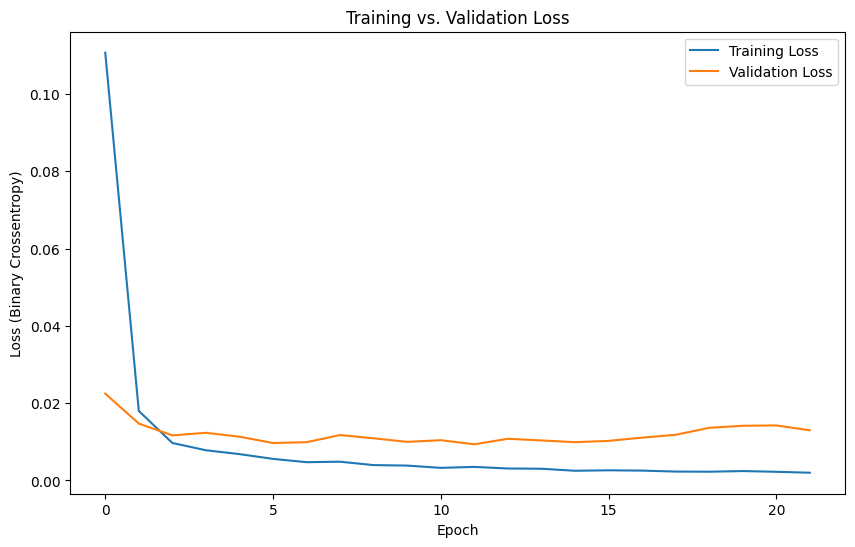

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.show()
#

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_test_int types: [0 1]
y_pred types: [0 1]

--- Model Performance on Test Set (FIXED) ---
Accuracy: 0.9985
ROC-AUC Score: 0.9815

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9497
           1       0.68      0.97      0.80        29

    accuracy                           1.00      9526
   macro avg       0.84      0.98      0.90      9526
weighted avg       1.00      1.00      1.00      9526



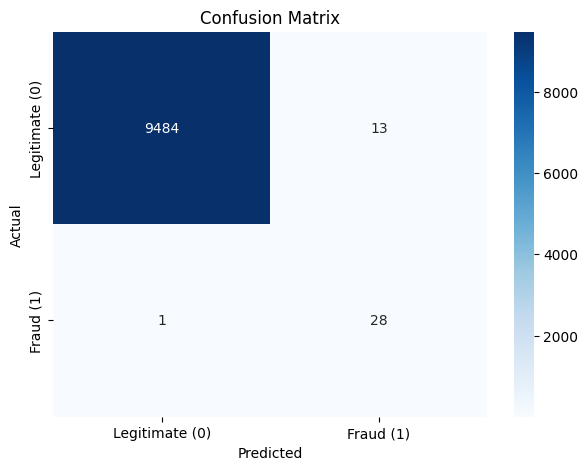

In [24]:
# --- FIX: Convert y_test to integer type to match y_pred ---
y_test_int = y_test.astype(int)

# --- RE-EVALUATE using the integer version of the true labels ---
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported for the Counter check

# Get predictions (this part is fine, as y_pred is already int32)
y_pred_proba = baseline_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Check to confirm types are now consistent
print("y_test_int types:", np.unique(y_test_int))
print("y_pred types:", np.unique(y_pred))


# Calculate metrics using y_test_int
accuracy = baseline_model.evaluate(X_test, y_test_int, verbose=0)[1]
# The report will now use the integer key '1', which exists
f1 = classification_report(y_test_int, y_pred, output_dict=True)['1']['f1-score']
roc_auc = roc_auc_score(y_test_int, y_pred_proba)

print("\n--- Model Performance on Test Set (FIXED) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test_int, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate (0)', 'Fraud (1)'],
            yticklabels=['Legitimate (0)', 'Fraud (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from collections import Counter

# Check the true labels in the test set
print("True Class Distribution in y_test:", Counter(y_test))

# Check the model's predictions in the test set
print("Predicted Class Distribution in y_pred:", Counter(y_pred.flatten()))

True Class Distribution in y_test: Counter({np.float64(0.0): 9497, np.float64(1.0): 29})
Predicted Class Distribution in y_pred: Counter({np.int32(0): 9485, np.int32(1): 41})


In [16]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("📈 Final Model Evaluation on Unseen Test Set")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}\n")

print("Detailed Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=["Legit (0)", "Fraud (1)"]))


📈 Final Model Evaluation on Unseen Test Set
Precision : 0.8667
Recall    : 1.0000
F1-score  : 0.9286
ROC-AUC   : 1.0000

Detailed Classification Report:

              precision    recall  f1-score   support

   Legit (0)       1.00      1.00      1.00      3269
   Fraud (1)       0.87      1.00      0.93        13

    accuracy                           1.00      3282
   macro avg       0.93      1.00      0.96      3282
weighted avg       1.00      1.00      1.00      3282



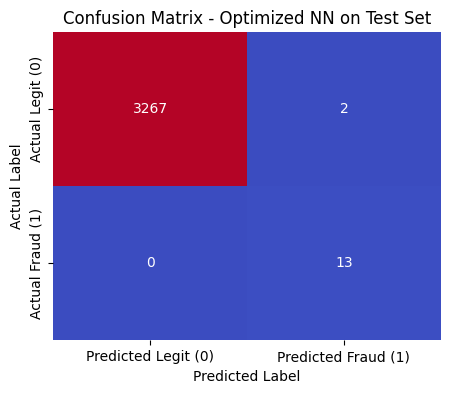

True Negatives : 3267
False Positives: 2
False Negatives: 0
True Positives : 13


In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted Legit (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Legit (0)', 'Actual Fraud (1)'])
plt.title("Confusion Matrix - Optimized NN on Test Set")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")


In [19]:
layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4))


<Dense name=dense_7, built=False>

In [20]:
layers.Dropout(0.4)


<Dropout name=dropout_4, built=True>

In [21]:
layers.Dense(32, activation='relu')
layers.Dense(16, activation='relu')


<Dense name=dense_9, built=False>

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


In [23]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")

# 1. Quick info
df.info()

# 2. Count of missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 3. Percentage of missing values
print("\nPercentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))

# 4. Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

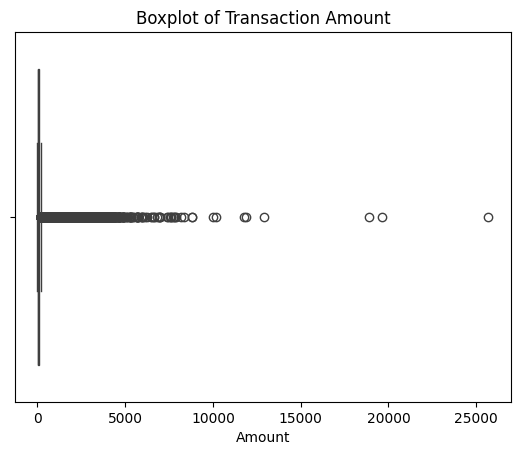

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Amount' to check for outliers
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

# Statistical summary
df['Amount'].describe()


In [27]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")


Outliers detected: 31904
Percentage of outliers: 11.20%


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


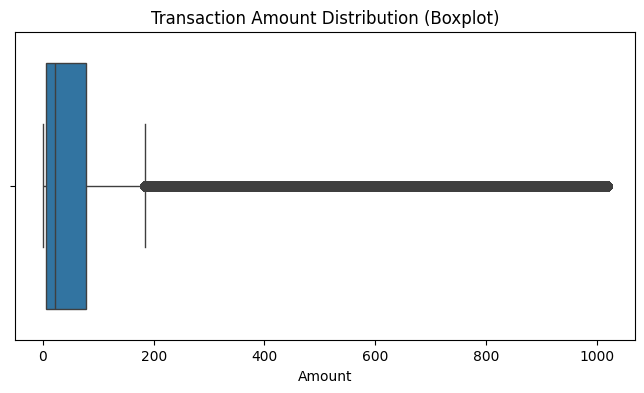

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Amount'])
plt.title('Transaction Amount Distribution (Boxplot)')
plt.show()
